In [113]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np

In [114]:
df = pd.read_csv('CreditScoring.csv')

In [115]:
df.shape

(4455, 14)

In [116]:
df.columns = df.columns.str.lower()

In [117]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [118]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [119]:
status_values = {
    0: 'unknown', 1: 'ok', 2: 'default'
}

In [120]:
df['status'] = df.status.map(status_values)

In [121]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [122]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [123]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [124]:
for cols in ['income','assets','debt']:
    df[cols] = df[cols].replace(99999999, np.nan)

In [125]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [126]:
df = df[df.status != 'unknown'].reset_index(drop=True)

In [127]:
df.shape

(4454, 14)

In [128]:
df['status'] = (df.status == 'default').astype(int)

In [129]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.00,0.00,0.00,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.00,0.00,0.00,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.00,3000.00,0.00,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.00,2500.00,0.00,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.00,0.00,0.00,310,910


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)

In [132]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((3563, 14), (2672, 14), (891, 14), (891, 14))

In [133]:
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1446,0,3,parents,60,25,single,no,fixed,35,130.00,6000.00,0.00,625,1083
350,0,30,rent,60,52,married,no,freelance,70,100.00,14500.00,0.00,1250,1563
2206,0,4,parents,60,28,divorced,no,fixed,35,185.00,0.00,0.00,1500,1797
2239,0,17,owner,36,38,married,no,freelance,75,0.00,19000.00,800.00,700,795
671,1,15,owner,36,49,married,no,freelance,75,70.00,3572.00,1728.00,1650,2755


In [134]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [135]:
y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

In [136]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
del df_train['status']
del df_val['status']
del df_test['status']

In [138]:
df_train.shape, df_val.shape, df_test.shape

((2672, 13), (891, 13), (891, 13))

In [139]:
df_train = df_train.fillna(0)

In [140]:
df_val.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [142]:
train_dicts = df_train.to_dict(orient='records')

In [143]:
dv = DictVectorizer(sparse=False)

In [144]:
X_train = dv.fit_transform(train_dicts)

In [145]:
dt = DecisionTreeClassifier()

In [146]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [147]:
feature_names = dv.get_feature_names_out()
feature_names

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [148]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [149]:
y_pred = dt.predict_proba(X_val)[:,1]

In [150]:
from sklearn.metrics import roc_auc_score

In [151]:
roc_auc_score(y_val, y_pred)

np.float64(0.6514618120441257)

### Max-depth Decision Trees

In [152]:
dt = DecisionTreeClassifier(max_depth=2)

In [153]:
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(0.7153086605329734)

In [154]:
dt.fit(X_val, y_val)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7252667430224848)

In [155]:
from sklearn.tree import export_text

In [156]:
print(export_text(dt, feature_names=feature_names))

|--- records=yes <= 0.50
|   |--- seniority <= 3.50
|   |   |--- class: 0
|   |--- seniority >  3.50
|   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 5.50
|   |   |--- class: 1
|   |--- seniority >  5.50
|   |   |--- class: 0



## Decision Tree Learning Algorithm

#### Single-feature Trees

In [157]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [158]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [159]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [160]:
from IPython.display import display

In [161]:
for T in Ts:
    print('Threshold:',T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

Threshold: 0


,assets,status
2,0,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64

Threshold: 2000


,assets,status
1,2000,default
2,0,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok        0.67
default   0.33
Name: proportion, dtype: float64

Threshold: 3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok        0.80
default   0.20
Name: proportion, dtype: float64

Threshold: 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default   0.75
ok        0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok        0.75
default   0.25
Name: proportion, dtype: float64

Threshold: 5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default   0.50
ok        0.50
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default   0.50
ok        0.50
Name: proportion, dtype: float64

Threshold: 8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok   1.00
Name: proportion, dtype: float64



#### Multi-feature Trees

In [162]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [163]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [164]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 8000, 9000],
    'debt': [500, 1000, 2000]
}

In [165]:
for feature, Ts in thresholds.items():
    print('#####################')
    print('feature:',feature)
    for T in Ts:
        print('Threshold:', T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
feature: assets
Threshold: 0


,assets,debt,status
2,0,1000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64

Threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.67
default   0.33
Name: proportion, dtype: float64

Threshold: 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok        0.80
default   0.20
Name: proportion, dtype: float64

Threshold: 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default   0.75
ok        0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok        0.75
default   0.25
Name: proportion, dtype: float64

Threshold: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok   1.00
Name: proportion, dtype: float64

Threshold: 9000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
default   0.50
ok        0.50
Name: proportion, dtype: float64


,assets,debt,status


Series([], Name: proportion, dtype: float64)

#####################
#####################
feature: debt
Threshold: 500


,assets,debt,status
6,9000,500,ok


status
ok   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64

Threshold: 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok        0.67
default   0.33
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default   1.00
Name: proportion, dtype: float64

Threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default   1.00
Name: proportion, dtype: float64

#####################


## Stopping Criteria

In [166]:
#Left or Right Group is already pure
#Max Depth Reached
#Left or Right Group is too small to split

## Decision Trees Parameter Tuning

In [167]:
#Tuning with max_depth

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.640
   2 -> 0.716
   3 -> 0.748
   4 -> 0.758
   5 -> 0.745
   6 -> 0.741
  10 -> 0.666
  15 -> 0.617
  20 -> 0.660
None -> 0.647


In [168]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [169]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values('auc', ascending=False)

,max_depth,min_samples_leaf,auc
20,6,20,0.78
22,6,100,0.78
19,6,15,0.77
14,5,100,0.77
18,6,10,0.77
6,4,100,0.76
12,5,20,0.76
11,5,15,0.76
10,5,10,0.76
1,4,5,0.76


## Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [172]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [173]:
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.799134968955332)

#### Tune hyper-parameters

In [174]:
scores = []
for n in range(10, 121, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [175]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores.sort_values('auc', ascending=False)

,n_estimators,auc
11,120,0.83
10,110,0.83
9,100,0.83
7,80,0.83
8,90,0.83
5,60,0.83
6,70,0.83
4,50,0.82
3,40,0.82
2,30,0.82


In [176]:
from matplotlib import pyplot as plt

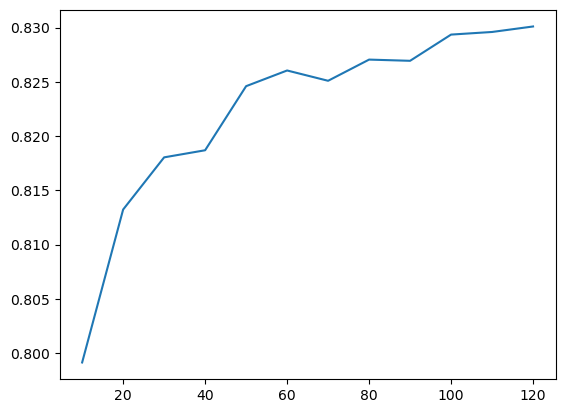

In [177]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [178]:
#Tune max_depth

scores = []
for d in [5, 10, 15]:  
    for n in range(10, 121, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, d, auc))

In [179]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','max_depth','auc'])

In [180]:
df_scores.sort_values('max_depth', ascending=False)

,n_estimators,max_depth,auc
31,80,15,0.82
30,70,15,0.82
29,60,15,0.82
28,50,15,0.82
24,10,15,0.79
25,20,15,0.81
26,30,15,0.81
27,40,15,0.82
35,120,15,0.83
34,110,15,0.83


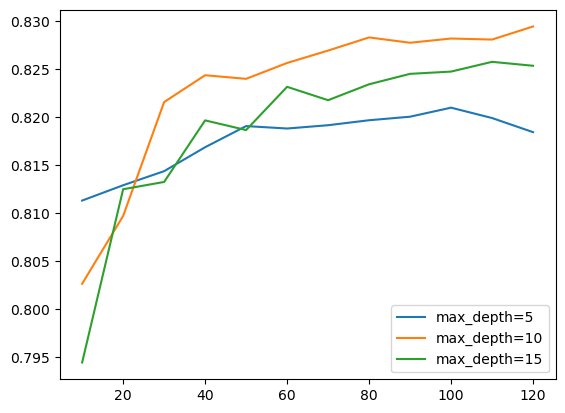

In [181]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

best max_depth = 10

In [182]:
#Tune min_samples_leaf

scores = []
for s in [1, 3, 5, 10, 50]:  
    for n in range(10, 121, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_leaf=s, random_state=42)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, s, auc))

In [183]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','min_samples_leaf','auc'])
df_scores.sort_values('min_samples_leaf',ascending=False)

,n_estimators,min_samples_leaf,auc
51,40,50,0.81
50,30,50,0.82
49,20,50,0.82
48,10,50,0.81
56,90,50,0.82
57,100,50,0.82
58,110,50,0.82
59,120,50,0.82
55,80,50,0.82
54,70,50,0.82


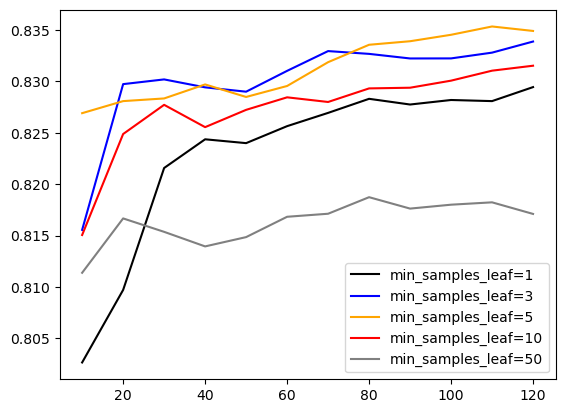

In [184]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Best min_samples_leaf = 3

## XGBoost

In [185]:
import xgboost as xgb

In [186]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [187]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [188]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [189]:
y_pred = model.predict(dval)

In [190]:
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.8363463741033215)

In [191]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [192]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

#### convert output to dataframe

In [193]:
s = output.stdout
s

'[0]\ttrain-auc:0.86257\tval-auc:0.75553\n[5]\ttrain-auc:0.92769\tval-auc:0.82767\n[10]\ttrain-auc:0.95295\tval-auc:0.83788\n[15]\ttrain-auc:0.96746\tval-auc:0.84178\n[20]\ttrain-auc:0.97688\tval-auc:0.83783\n[25]\ttrain-auc:0.98286\tval-auc:0.83715\n[30]\ttrain-auc:0.98687\tval-auc:0.83570\n[35]\ttrain-auc:0.99092\tval-auc:0.83470\n[40]\ttrain-auc:0.99332\tval-auc:0.83314\n[45]\ttrain-auc:0.99552\tval-auc:0.83254\n[50]\ttrain-auc:0.99726\tval-auc:0.83069\n[55]\ttrain-auc:0.99823\tval-auc:0.82929\n[60]\ttrain-auc:0.99873\tval-auc:0.82783\n[65]\ttrain-auc:0.99915\tval-auc:0.82717\n[70]\ttrain-auc:0.99942\tval-auc:0.82576\n[75]\ttrain-auc:0.99975\tval-auc:0.82419\n[80]\ttrain-auc:0.99991\tval-auc:0.82242\n[85]\ttrain-auc:0.99996\tval-auc:0.82044\n[90]\ttrain-auc:0.99998\tval-auc:0.82176\n[95]\ttrain-auc:1.00000\tval-auc:0.82112\n[100]\ttrain-auc:1.00000\tval-auc:0.81973\n[105]\ttrain-auc:1.00000\tval-auc:0.81872\n[110]\ttrain-auc:1.00000\tval-auc:0.81906\n[115]\ttrain-auc:1.00000\tval-au

In [194]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86257\tval-auc:0.75553'

In [195]:
line.split('\t')

['[0]', 'train-auc:0.86257', 'val-auc:0.75553']

In [196]:
num_iter, train_auc, val_auc = line.split('\t')
num_iter, train_auc, val_auc

('[0]', 'train-auc:0.86257', 'val-auc:0.75553')

In [197]:
it = int(num_iter.strip('[]'))
train = float(train_auc.split(':')[1])
val = float(val_auc.split(':')[1])

it, train, val

(0, 0.86257, 0.75553)

In [198]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [199]:
df_xgb_score = parse_xgb_output(output)
df_xgb_score.head(5).sort_values('train_auc', ascending=False)

,num_iter,train_auc,val_auc
4,20,0.98,0.84
3,15,0.97,0.84
2,10,0.95,0.84
1,5,0.93,0.83
0,0,0.86,0.76


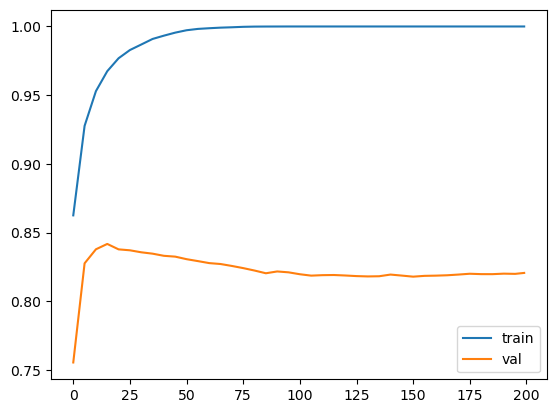

In [200]:
plt.plot(df_xgb_score.num_iter, df_xgb_score.train_auc, label='train')
plt.plot(df_xgb_score.num_iter, df_xgb_score.val_auc, label='val')
plt.legend()

#### XGBOOST PARAMETER TUNUNG

##### Tuning eta (Learning Rate), max_depth and min_child_weight

In [213]:
scores = {}

##### learning rate

In [222]:
%%capture output

# eta = [0.01, 0.1, 0.3, 0.6, 1.0]

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [223]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

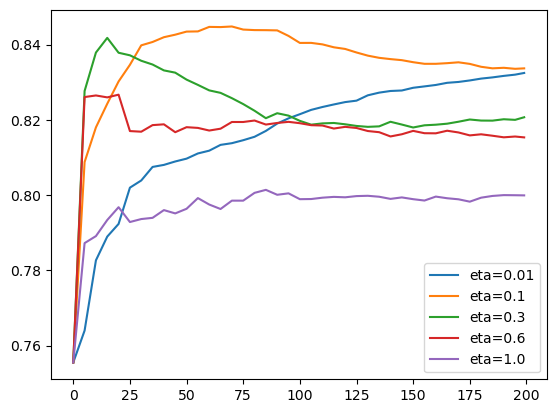

In [224]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

#plt.ylim(0.8, 0.84)
plt.legend()

##### eta = 0.1 is the best learning rate

In [225]:
score = {}

##### max_depth

In [235]:
%%capture output

# max_depth = [3, 4, 5, 6]

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [236]:
key = 'max_depth=%s' %(xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

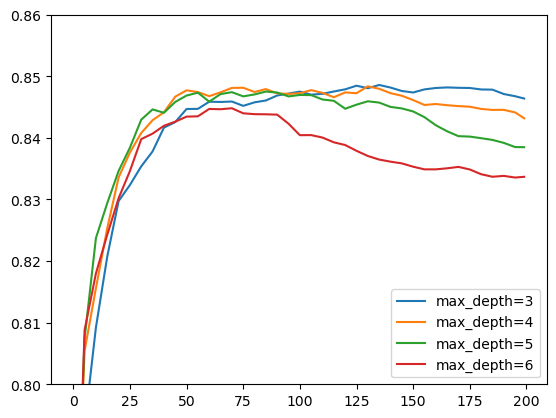

In [247]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.86)
plt.legend()

##### max_depth = 3 is the best tree depth

In [267]:
scores = {}

#### min_child_weight

In [274]:
%%capture output

# min_child_weight = [1, 10, 20, 30]

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [275]:
key = 'min_child_weight=%s' %(xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

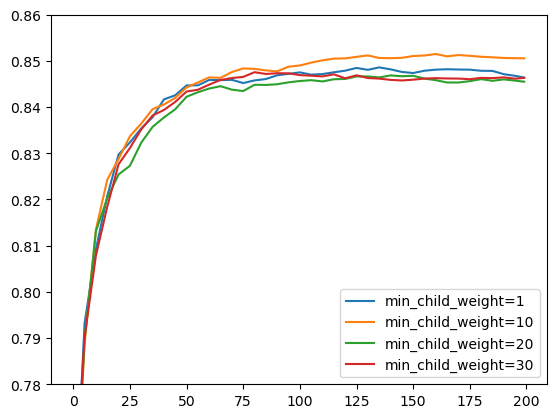

In [276]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.78, 0.86)
plt.legend()

#### min_child_weight = 10 is the bset leaf split

#### Selecting best model based on best params

In [279]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [281]:
y_pred = dt.predict_proba(X_val)[:,1]

In [282]:
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.7768521309301343


In [283]:
rf = RandomForestClassifier(n_estimators=120, max_depth=10, min_samples_leaf=3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=120,
                       random_state=42)

In [284]:
y_pred = rf.predict_proba(X_val)[:,1]

In [286]:
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.8338748568328411


In [287]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [288]:
y_pred = model.predict(dval)

In [289]:
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.8505485562722286


#### xgboost is the best performing model

In [290]:
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
4399,0,2,parents,60,25,single,no,fixed,35,84.00,0.00,0.00,1150,1705
3235,0,1,parents,48,24,single,no,fixed,35,75.00,0.00,0.00,1050,1429
1701,0,30,rent,36,59,married,no,freelance,50,52.00,25000.00,0.00,1000,1298
1438,1,0,rent,36,26,married,no,partime,80,195.00,0.00,0.00,600,785
4013,0,0,owner,24,18,single,no,partime,35,104.00,12000.00,0.00,1700,1726


In [292]:
df_full_train = df_full_train.reset_index(drop=True)

In [295]:
df_full_train.status.value_counts()

status
0    2574
1     989
Name: count, dtype: int64

In [296]:
y_full_train = df_full_train.status.values

In [299]:
del df_full_train['status']

In [312]:
dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train.to_dict(orient='records')

X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [313]:
features__ = dv.get_feature_names_out().tolist()

In [316]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features__)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names = features__)

In [317]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [318]:
y_pred = model.predict(dtest)

In [321]:
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.828561094701308
